In [92]:
import matplotlib.pyplot as plt
import numpy as np
import ee
import pandas as pd
ee.Initialize()

In [98]:
# Init params
landsat = ee.ImageCollection("LANDSAT/LC8_L1T_8DAY_NDVI")
years = [x for x in range(2013, 2016)]
area = (ee.FeatureCollection('ft:1Lhpvhw2Xea1VpyTQdKXM5K8uVcxKXT3OjCtmfXAi').filter(ee.Filter().eq('COUNTY num', 199)))

In [100]:
# # Optionally define an area by specifying a polygon
# area = ee.Geometry.Polygon(
#          [[[-98.51749420166016, 37.921722001139806],
#            [-98.5202407836914, 37.790794553924435],
#            [-98.31047058105469, 37.790794553924414],
#            [-98.3060073852539, 37.92009699991215]]])

In [150]:
# import the RS products
ls = ee.ImageCollection("LANDSAT/LC8_L1T_8DAY_NDVI")

# Define time range
analysis_year = 2014

# create list for years
years = range(2013,2017);
 
# make a list with months
 
def main(year,product):
    # Set date in ee date format
    startdate = ee.Date.fromYMD(year,1,1)
    enddate = ee.Date.fromYMD(year+1,12,31)
    
    years = range(year, year+1)
    
    months = range(7,8)
    
    # Filter chirps
    filtered = ls.filterDate(startdate, enddate).sort('system:time_start', False).select("NDVI")

    # calculate the monthly mean
    def calcMonthlyMean(imageCollection):
        mylist = ee.List([])
        for y in years:
            for m in months:
                w = imageCollection.filter(ee.Filter.calendarRange(y, y, 'year')).filter(ee.Filter.calendarRange(m, m, 'month')).mean();
                mylist = mylist.add(w.set('year', y).set('month', m).set('date', ee.Date.fromYMD(y,m,1)).set('system:time_start',ee.Date.fromYMD(y,m,1)))
        return ee.ImageCollection.fromImages(mylist)

    # run the calcMonthlyMean function
    monthly = ee.ImageCollection(calcMonthlyMean(filtered))

    # select the region of interest, 30 is the cellsize in meters
    monthly = monthly.getRegion(area,100,"epsg:4326").getInfo()
    
    # Make it an array
    df = df_from_ee_object(monthly)
    arr = array_from_df(df, "NDVI")
    
    return arr


In [151]:
t = main(analysis_year, landsat)

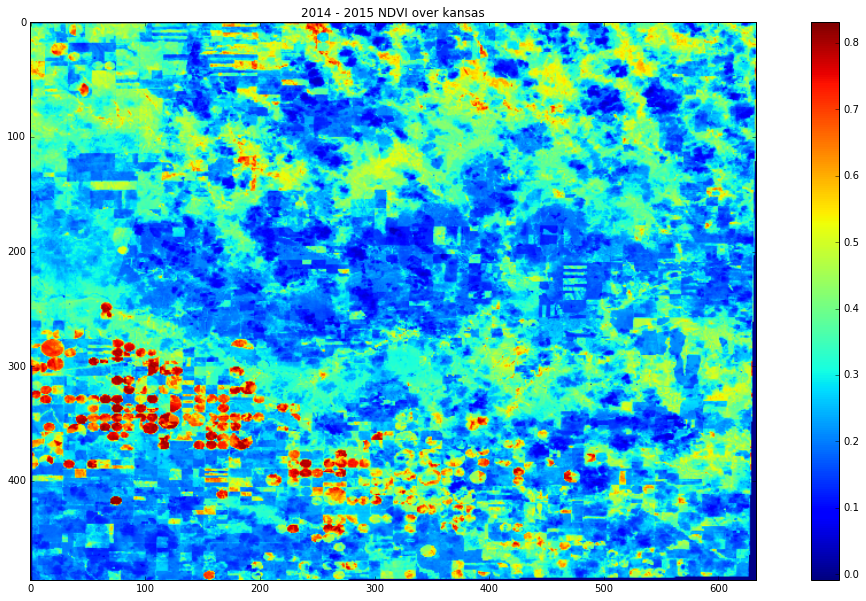

In [152]:
plt.figure(figsize=(20, 10))
plt.imshow(t)
plt.colorbar()
plt.title("{} - {} NDVI over kansas".format(str(analysis_year), str(analysis_year+1)))
plt.show()

In [153]:
results = []
for y in years:
    results.append(main(y,landsat))

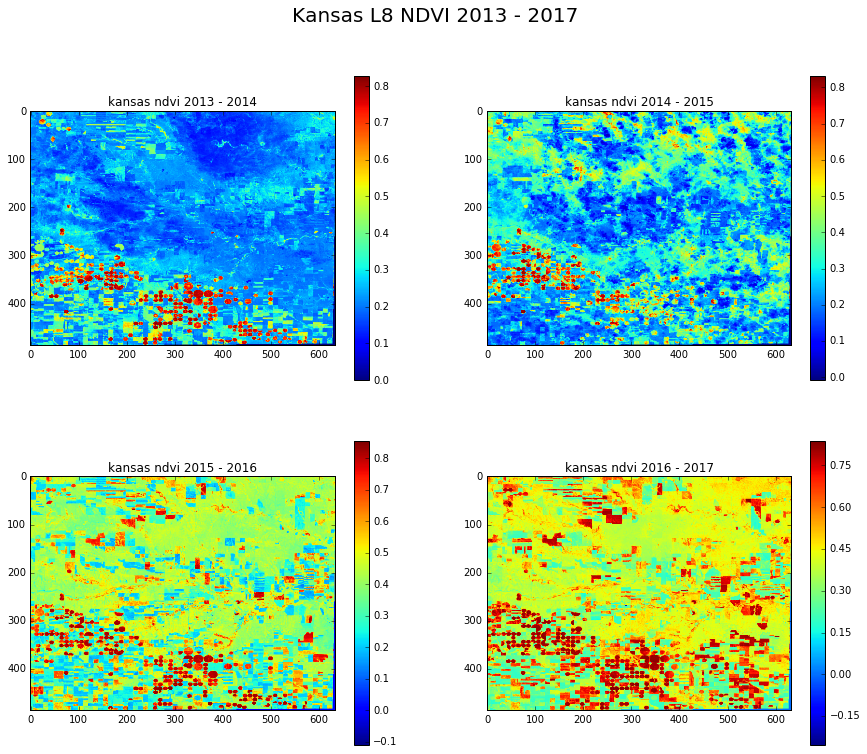

In [155]:
plt.figure(figsize=(15, 12))

plt.suptitle("Kansas L8 NDVI 2013 - 2017", size = 20)

plt.subplot(2,2,1)
plt.imshow(results[0])
plt.title("kansas ndvi 2013 - 2014")
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(results[1])
plt.title("kansas ndvi 2014 - 2015")
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(results[2])
plt.title("kansas ndvi 2015 - 2016")
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(results[3])
plt.title("kansas ndvi 2016 - 2017")
plt.colorbar()

plt.show()